In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime,timezone
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from pandas.plotting import lag_plot

In [2]:
#reading raw 5 min data 
file_paths = ['./stock_data/BBY_full_5min_adjsplitdiv.txt', './stock_data/FCFS_full_5min_adjsplitdiv.txt', './stock_data/GME_full_5min_adjsplitdiv.txt', './stock_data/IWM_full_5min_adjsplitdiv.txt', './stock_data/ODP_full_5min_adjsplitdiv.txt','./stock_data/SPX_full_5min.txt'] 
headers_list = [['DateTime', 'Open', 'High','Low','Close','Volume'],
                ['DateTime', 'Open', 'High','Low','Close','Volume'],
                ['DateTime', 'Open', 'High','Low','Close','Volume'],
                ['DateTime', 'Open', 'High','Low','Close','Volume'],
                ['DateTime', 'Open', 'High','Low','Close','Volume'],
                ['DateTime', 'Open', 'High','Low','Close']]

# Read each file and store it in a corresponding variable
BBY_raw, FCFS_raw, GME_raw, IWM_raw, ODP_raw, SPX_raw = [
    pd.read_csv(file_path, header=None, names=headers)
    for file_path, headers in zip(file_paths, headers_list)
]

In [5]:
#also reading in daily data for sub analysis 
file_paths = ['./stock_data/BBY_full_1day_adjsplitdiv.txt', './stock_data/FCFS_full_1day_adjsplitdiv.txt', './stock_data/GME_full_1day_adjsplitdiv.txt', './stock_data/IWM_full_1day_adjsplitdiv.txt', './stock_data/ODP_full_1day_adjsplitdiv.txt','./stock_data/SPX_full_1day.txt'] 
headers_list = [['DateTime', 'Open', 'High','Low','Close','Volume'],
                ['DateTime', 'Open', 'High','Low','Close','Volume'],
                ['DateTime', 'Open', 'High','Low','Close','Volume'],
                ['DateTime', 'Open', 'High','Low','Close','Volume'],
                ['DateTime', 'Open', 'High','Low','Close','Volume'],
                ['DateTime', 'Open', 'High','Low','Close']]

# Read each file and store it in a corresponding variable
BBY_raw_1d, FCFS_raw_1d, GME_raw_1d, IWM_raw_1d, ODP_raw_1d, SPX_raw_1d = [
    pd.read_csv(file_path, header=None, names=headers)
    for file_path, headers in zip(file_paths, headers_list)
]

In [7]:
#correcting datatypes
dataframes = [BBY_raw, FCFS_raw, GME_raw, IWM_raw, ODP_raw, SPX_raw, 
              BBY_raw_1d, FCFS_raw_1d, GME_raw_1d, IWM_raw_1d, ODP_raw_1d, 
              SPX_raw_1d]
for df in dataframes:
    df['DateTime'] = pd.to_datetime(df['DateTime'])

print(GME_raw.dtypes)

DateTime    datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume             float64
dtype: object


In [9]:
#getting series for time period in consideration
start_date = '2020-12-15' #15 dec
end_date = '2021-02-15' #15 feb
market_open = '09:30:00'
market_close = '16:00:00'

# Filter and assign to separate DataFrames
#BBY_time  = BBY_raw[(BBY_raw['DateTime'] >= start_date) & (BBY_raw['DateTime'] <= end_date)]
#BBY_intra_5min = BBY_time[(BBY_time['DateTime'].dt.time >= pd.to_datetime(market_open).time()) &
                           # (BBY_time['DateTime'].dt.time <= pd.to_datetime(market_close).time())]

#FCFS_time = FCFS_raw[(FCFS_raw['DateTime'] >= start_date) & (FCFS_raw['DateTime'] <= end_date)]
#FCFS_intra_5min = FCFS_time[(FCFS_time['DateTime'].dt.time >= pd.to_datetime(market_open).time()) &
                            #(FCFS_time['DateTime'].dt.time <= pd.to_datetime(market_close).time())]

GME_time  = GME_raw[(GME_raw['DateTime'] >= start_date) & (GME_raw['DateTime'] <= end_date)]
GME_intra_5min = GME_time[(GME_time['DateTime'].dt.time >= pd.to_datetime(market_open).time()) &
                            (GME_time['DateTime'].dt.time <= pd.to_datetime(market_close).time())]

#IWM_time  = IWM_raw[(IWM_raw['DateTime'] >= start_date) & (IWM_raw['DateTime'] <= end_date)]
#IWM_intra_5min = IWM_time[(IWM_time['DateTime'].dt.time >= pd.to_datetime(market_open).time()) &
                            #(IWM_time['DateTime'].dt.time <= pd.to_datetime(market_close).time())]

#ODP_time  = ODP_raw[(ODP_raw['DateTime'] >= start_date) & (ODP_raw['DateTime'] <= end_date)]
#ODP_intra_5min = ODP_time[(ODP_time['DateTime'].dt.time >= pd.to_datetime(market_open).time()) &
                            #(ODP_time['DateTime'].dt.time <= pd.to_datetime(market_close).time())]

#SPX_time  = SPX_raw[(SPX_raw['DateTime'] >= start_date) & (SPX_raw['DateTime'] <= end_date)]
#SPX_intra_5min = SPX_time[(SPX_time['DateTime'].dt.time >= pd.to_datetime(market_open).time()) &
                           # (SPX_time['DateTime'].dt.time <= pd.to_datetime(market_close).time())]

In [11]:
GME_intra_5min.head()

,DateTime,Open,High,Low,Close,Volume
392415,2020-12-15 09:30:00,3.1950,3.2138,3.1525,3.2088,1071560.0
392416,2020-12-15 09:35:00,3.2125,3.2675,3.2125,3.2325,850936.0
392417,2020-12-15 09:40:00,3.2350,3.2375,3.1900,3.1975,446976.0
392418,2020-12-15 09:45:00,3.1975,3.2100,3.1690,3.1715,244344.0
392419,2020-12-15 09:50:00,3.1675,3.1750,3.1200,3.1600,628188.0


In [15]:
#doing same with daily data
daily_dataframes = ['BBY_daily', 'FCFS_daily', 'GME_daily', 'ODP_daily', 'IWM_daily', 'SPX_daily']
raw_dataframes = [BBY_raw_1d, FCFS_raw_1d, GME_raw_1d, ODP_raw_1d, IWM_raw_1d, SPX_raw_1d]

for i, df in enumerate(raw_dataframes):
    filtered_df = df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)].drop(columns=['Open', 'High', 'Low'])
    globals()[daily_dataframes[i]] = filtered_df 

In [21]:

date_range = pd.date_range(start='2020-12-15 09:30:00', end='2021-02-15 16:00:00', freq='5min')
datetime_df = pd.DataFrame(date_range, columns=['DateTime'])
# List of non-trading dates to be removed
non_trade_dates = ['2020-12-25', '2021-01-01', '2021-01-18', '2021-02-15', '2020-12-05', '2020-12-06', '2020-12-12', 
                   '2020-12-13', '2020-12-19', '2020-12-20', '2020-12-26', '2020-12-27', '2021-01-02', '2021-01-03', 
                   '2021-01-09', '2021-01-10', '2021-01-16', '2021-01-17', '2021-01-23', '2021-01-24', '2021-01-30', 
                   '2021-01-31', '2021-02-06', '2021-02-07', '2021-02-13', '2021-02-14']

non_trade_dates = pd.to_datetime(non_trade_dates)
datetime_df = datetime_df[~datetime_df['DateTime'].dt.normalize().isin(non_trade_dates)]
datetime_df = datetime_df[(datetime_df['DateTime'].dt.time >= pd.to_datetime('09:30:00').time()) & 
        (datetime_df['DateTime'].dt.time <= pd.to_datetime('16:00:00').time())]

len(datetime_df)


3239

In [23]:

dataframes = [BBY_intra_5min, FCFS_intra_5min, IWM_intra_5min, ODP_intra_5min, SPX_intra_5min, GME_intra_5min]
df_names = ['BBY', 'FCFS', 'IWM', 'ODP', 'SPX','GME'] 

comb_intra_5min = datetime_df.copy()

for i, df_to_merge in enumerate(dataframes):

    columns_to_select = ['DateTime', 'Close'] 
    if 'Volume' in df_to_merge.columns:
        columns_to_select.append('Volume')
    df_to_merge_selected = df_to_merge[columns_to_select]
    df_to_merge_selected = df_to_merge_selected.rename(columns={
        'Volume': f'{df_names[i]}_Volume',
        'Close': f'{df_names[i]}_Close'
    })
    comb_intra_5min = comb_intra_5min.merge(df_to_merge_selected, on='DateTime', how='left')

comb_intra_5min.loc[:, comb_intra_5min.columns.str.contains('Close')] = comb_intra_5min.loc[:, comb_intra_5min.columns.str.contains('Close')].ffill()
print(comb_intra_5min.head())


             DateTime  BBY_Close  BBY_Volume  FCFS_Close  FCFS_Volume  \
0 2020-12-15 09:30:00    88.4245    106694.0     67.1836       1470.0   
1 2020-12-15 09:35:00    88.3557     60729.0     67.8940       3683.0   
2 2020-12-15 09:40:00    88.0374     42195.0     67.9603       2505.0   
3 2020-12-15 09:45:00    88.1836     36342.0     67.8940       2652.0   
4 2020-12-15 09:50:00    88.0331     37802.0     68.1592       2278.0   

   IWM_Close  IWM_Volume  ODP_Close  ODP_Volume  SPX_Close  GME_Close  \
0   181.5828    645873.0      27.13     11796.0    3674.65     3.2088   
1   181.6779    308921.0      27.06      1900.0    3676.10     3.2325   
2   181.4592    221083.0      27.13      2409.0    3672.81     3.1975   
3   181.3927    325721.0      27.13         NaN    3672.11     3.1715   
4   181.7708    180452.0      27.10      2585.0    3673.21     3.1600   

   GME_Volume  
0   1071560.0  
1    850936.0  
2    446976.0  
3    244344.0  
4    628188.0  


In [25]:
#calculating returns for 5 min data 
#return formula = (close price(t)- close price(t-1))/ close price(t-1)
comb_intra_5min.set_index('DateTime', inplace=True)
comb_intra_5min['BBY_5min_return'] = (comb_intra_5min['BBY_Close'] - comb_intra_5min['BBY_Close'].shift(1)) / comb_intra_5min['BBY_Close'].shift(1)
comb_intra_5min['FCFS_5min_return'] = (comb_intra_5min['FCFS_Close'] - comb_intra_5min['FCFS_Close'].shift(1)) / comb_intra_5min['FCFS_Close'].shift(1)
comb_intra_5min['IWM_5min_return'] = (comb_intra_5min['IWM_Close'] - comb_intra_5min['IWM_Close'].shift(1)) / comb_intra_5min['IWM_Close'].shift(1)
comb_intra_5min['ODP_5min_return'] = (comb_intra_5min['ODP_Close'] - comb_intra_5min['ODP_Close'].shift(1)) / comb_intra_5min['ODP_Close'].shift(1)
comb_intra_5min['SPX_5min_return'] = (comb_intra_5min['SPX_Close'] - comb_intra_5min['SPX_Close'].shift(1)) / comb_intra_5min['SPX_Close'].shift(1)
comb_intra_5min['GME_5min_return'] = (comb_intra_5min['GME_Close'] - comb_intra_5min['GME_Close'].shift(1)) / comb_intra_5min['GME_Close'].shift(1)

#dropping volume since focus is on price and returns
comb_intra_5min = comb_intra_5min[comb_intra_5min.columns.drop(list(comb_intra_5min.filter(regex='Volume')))]
comb_intra_5min.head()

,BBY_Close,FCFS_Close,IWM_Close,ODP_Close,SPX_Close,GME_Close,BBY_5min_return,FCFS_5min_return,IWM_5min_return,ODP_5min_return,SPX_5min_return,GME_5min_return
DateTime,,,,,,,,,,,,
2020-12-15 09:30:00,88.4245,67.1836,181.5828,27.13,3674.65,3.2088,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-15 09:35:00,88.3557,67.8940,181.6779,27.06,3676.10,3.2325,-0.000778,0.010574,0.000524,-0.002580,0.000395,0.007386
2020-12-15 09:40:00,88.0374,67.9603,181.4592,27.13,3672.81,3.1975,-0.003602,0.000977,-0.001204,0.002587,-0.000895,-0.010828
2020-12-15 09:45:00,88.1836,67.8940,181.3927,27.13,3672.11,3.1715,0.001661,-0.000976,-0.000366,0.000000,-0.000191,-0.008131
2020-12-15 09:50:00,88.0331,68.1592,181.7708,27.10,3673.21,3.1600,-0.001707,0.003906,0.002084,-0.001106,0.000300,-0.003626


In [29]:
#calculating return for remaining dataframes


dataframes = [BBY_daily, FCFS_daily, GME_daily, ODP_daily,
             IWM_daily,SPX_daily]

for df in dataframes:
    if 'DateTime' in df.columns:
     df.set_index('DateTime', inplace=True)
    if 'Volume' in df.columns:
        df.drop('Volume', axis=1, inplace=True)
    df['Close'].ffill()
    df['Return'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)
print(dataframes[0].head())


              Close    Return
DateTime                     
2020-12-15  88.6052       NaN
2020-12-16  89.0440  0.004952
2020-12-17  88.0460 -0.011208
2020-12-18  87.7105 -0.003811
2020-12-21  88.8719  0.013241


##### Plotting data and visualising trends

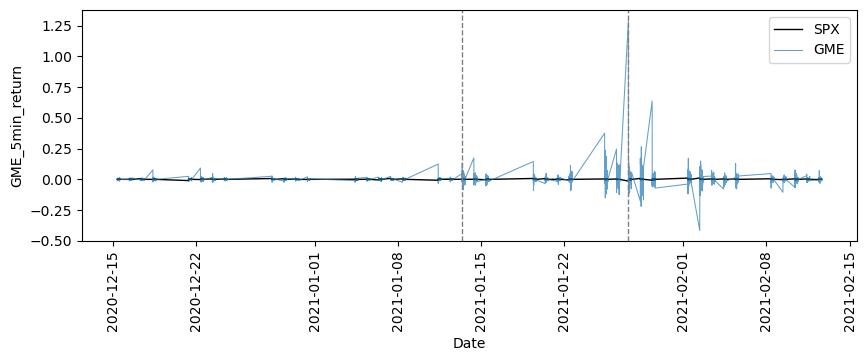

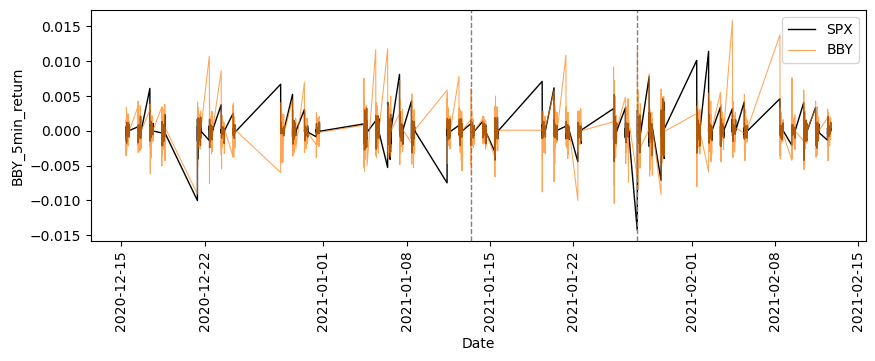

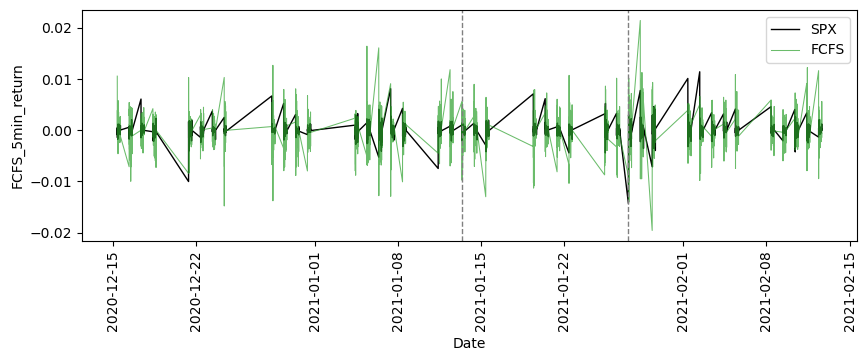

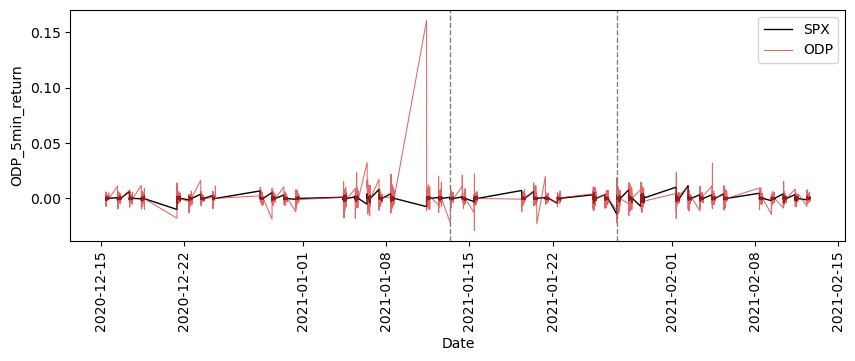

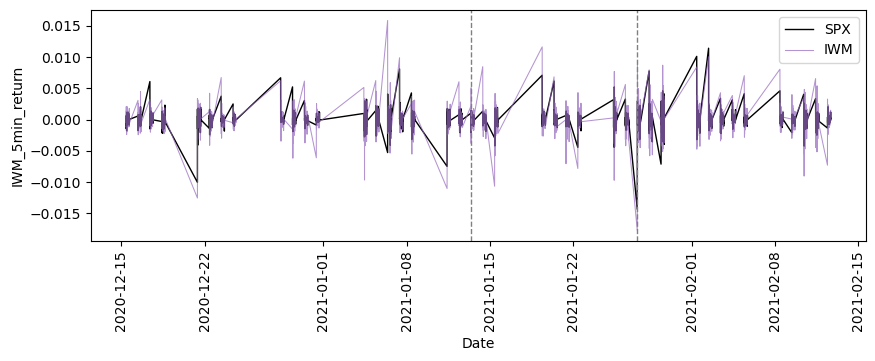

In [31]:
#plotting 5 min data for all tickers -returns
individual_returns = ['GME_5min_return','BBY_5min_return', 'FCFS_5min_return','ODP_5min_return','IWM_5min_return']
tickers = ['GME','BBY','FCFS','ODP','IWM']
vertical_dates =['2021-01-13 09:30:00','2021-01-27 09:30:30']
vertical_dates = pd.to_datetime(vertical_dates)
colors = list(mcolors.TABLEAU_COLORS)
for col, ticker,color in zip(individual_returns, tickers,colors):
    plt.figure(figsize=(10, 3))
    plt.plot(comb_intra_5min.index, comb_intra_5min['SPX_5min_return'], label='SPX', color='black', linewidth = 1)
    plt.plot(comb_intra_5min.index, comb_intra_5min[col], label=ticker, color = color, linewidth = 0.75, alpha = 0.7)
    
    for date in vertical_dates:
        plt.axvline(x=date, color='grey', linestyle='--', linewidth=1)
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()



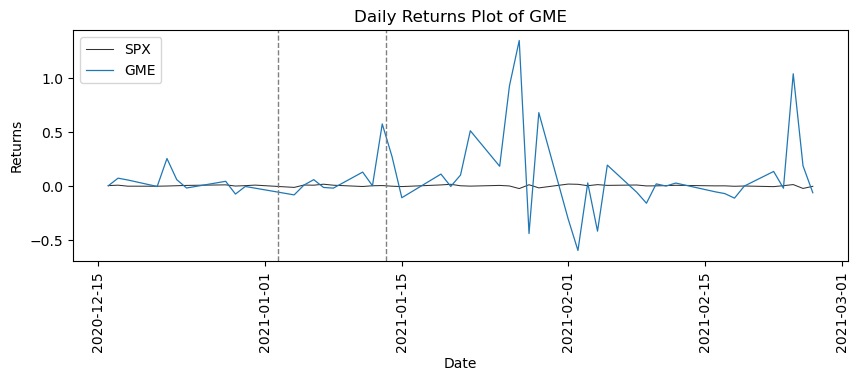

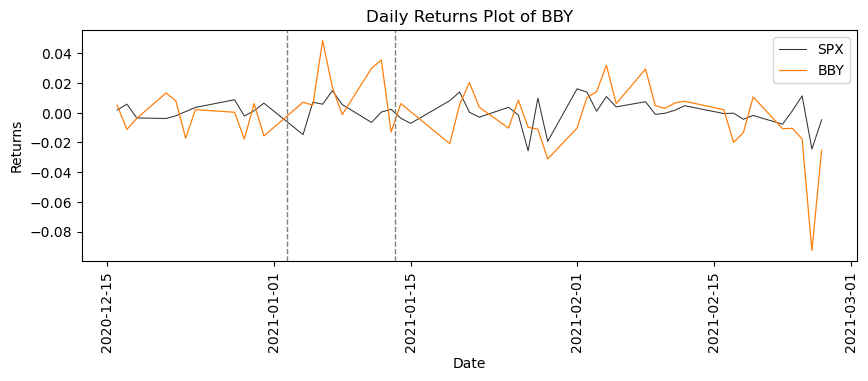

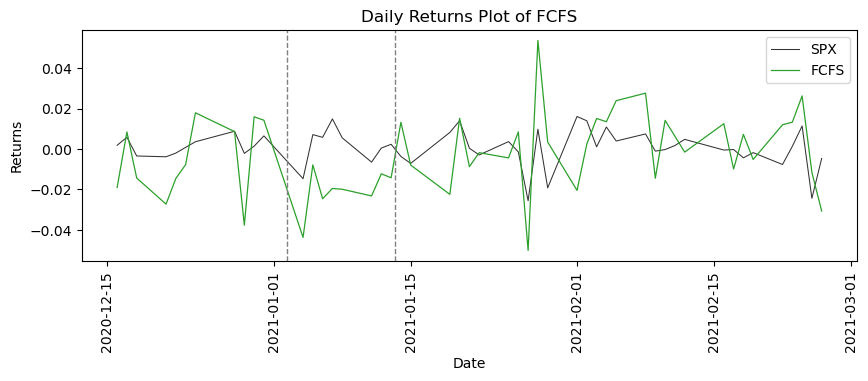

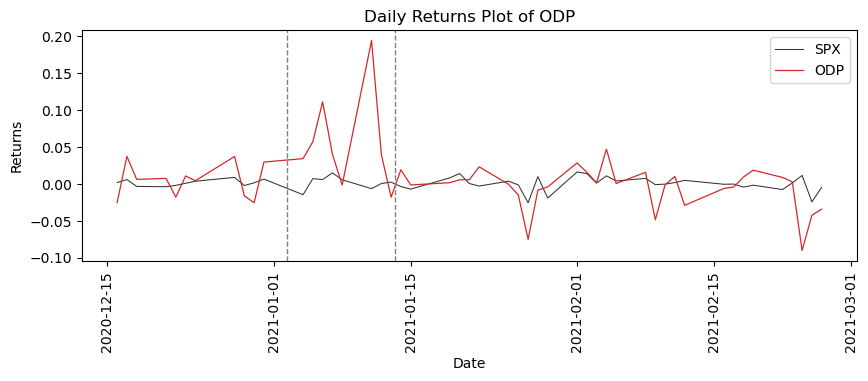

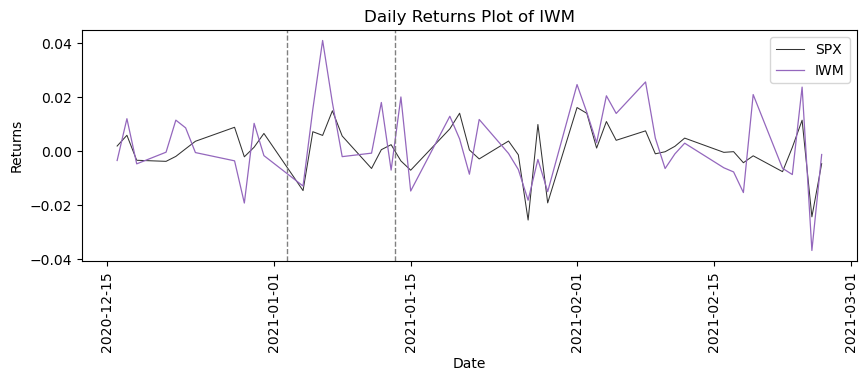

In [106]:
#plotting daily return against reference SPX
dfs = [GME_daily,BBY_daily, FCFS_daily,ODP_daily,IWM_daily]
tickers = ['GME','BBY','FCFS','ODP','IWM']
vertical_dates =['2021-01-13 09:30:00','2021-01-27 09:30:30']
vertical_dates = pd.to_datetime(vertical_dates)
colors = list(mcolors.TABLEAU_COLORS)
for df,ticker,color in zip(dfs,tickers,colors):
    plt.figure(figsize=(10, 3))
    plt.plot(SPX_daily.index, SPX_daily['Return'], label='SPX', color='black', linewidth = 0.75, alpha = 0.8)
    plt.plot(df.index, df['Return'], label=ticker, color = color, linewidth = 0.9)
    
    for date in vertical_dates:
        plt.axvline(x=date, color='grey', linestyle='--', linewidth=1)
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.title(f'Daily Returns Plot of {ticker}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

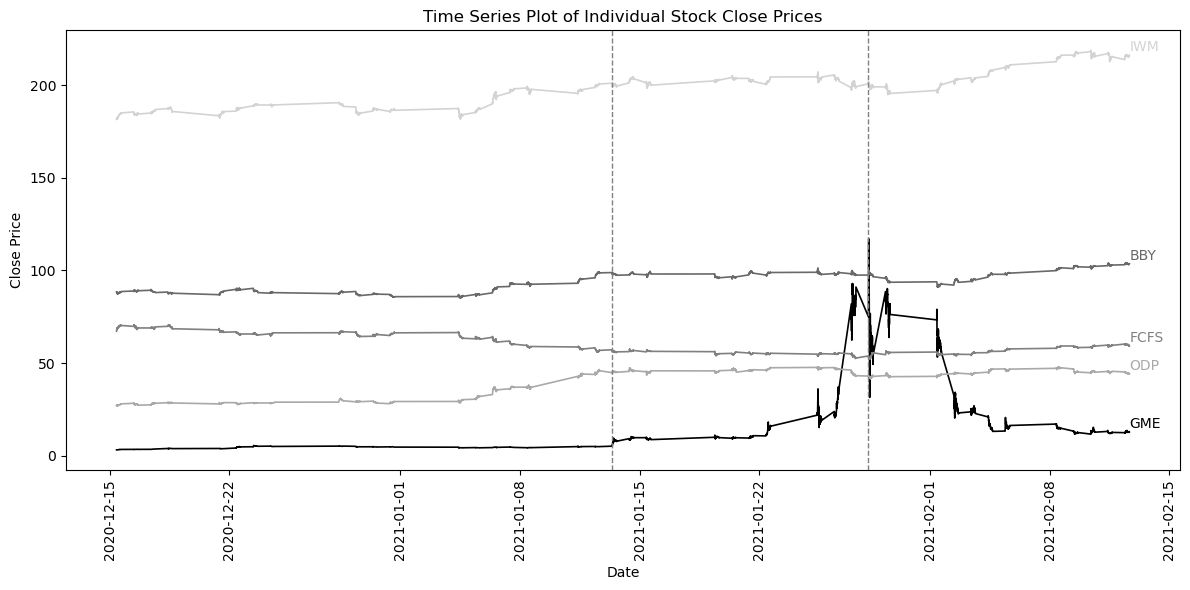

In [35]:
individual_close = ['GME_Close', 'BBY_Close', 'FCFS_Close', 'ODP_Close', 'IWM_Close']
tickers = ['GME', 'BBY', 'FCFS', 'ODP', 'IWM']
vertical_dates = ['2021-01-13 09:30:00', '2021-01-28 09:30:30']
vertical_dates = pd.to_datetime(vertical_dates)

# Set up color for GME to be red, and the rest in gray
colors = ['black', 'dimgray', 'gray', 'darkgray', 'lightgray']

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each individual close price on the same plot
for col, ticker, color in zip(individual_close, tickers, colors):
    line, = plt.plot(comb_intra_5min.index, comb_intra_5min[col], label=ticker, color=color, linewidth=1.2)
    
    # Add ticker name above the line (shifted a bit upwards)
    plt.text(comb_intra_5min.index[-1], line.get_ydata()[-1] + 0.5, ticker, 
             color=color, ha='left', va='bottom', fontsize=10)

# Add vertical lines at specified dates
for date in vertical_dates:
    plt.axvline(x=date, color='grey', linestyle='--', linewidth=1)

# Labeling and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Plot of Individual Stock Close Prices')

# Remove the legend since ticker names are above the lines now
plt.xticks(rotation=90)
plt.tight_layout()  # To prevent label clipping
plt.savefig("stock_close_prices.png", dpi=600)
plt.show()

plt.close()

In [58]:
#checking for stationarity in returns for all tickers at 5 min level
def kpss_test(data_df):
    test_stat, p_val = [], []
    cv_1pct, cv_5pct = [], []
    for c in data_df.columns: 
        kpss_res = kpss(data_df[c].dropna(), regression='ct')
        test_stat.append(kpss_res[0])
        p_val.append(kpss_res[1])
        cv_1pct.append(kpss_res[3]['1%'])
        cv_5pct.append(kpss_res[3]['5%'])
        
    kpss_res_df = pd.DataFrame({'Test statistic': test_stat, 
                               'p-value': p_val, 
                               'Critical value - 1%': cv_1pct,
                               'Critical value - 5%': cv_5pct,
                               }, 
                             index=data_df.columns).T
    kpss_res_df = kpss_res_df.round(4)
    return kpss_res_df

kpss_results = kpss_test(comb_intra_5min)
kpss_results

/var/folders/8r/lp807dgx5l1g14nqdf2kk0_m0000gn/T/ipykernel_65960/3864133273.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_res = kpss(data_df[c].dropna(), regression='ct')
/var/folders/8r/lp807dgx5l1g14nqdf2kk0_m0000gn/T/ipykernel_65960/3864133273.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_res = kpss(data_df[c].dropna(), regression='ct')
/var/folders/8r/lp807dgx5l1g14nqdf2kk0_m0000gn/T/ipykernel_65960/3864133273.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_res = kpss(data_df[c].dropna(), regression='ct')
/var/folders/8r/lp807dgx5l1g14nqdf2kk0_m0000gn/T/ipykernel_65960/3864133273.py:6: Int

,BBY_Close,FCFS_Close,IWM_Close,ODP_Close,SPX_Close,GME_Close,BBY_5min_return,FCFS_5min_return,IWM_5min_return,ODP_5min_return,SPX_5min_return,GME_5min_return
Test statistic,0.5287,1.842,0.4028,1.4494,0.3198,0.5425,0.0835,0.1201,0.0456,0.1311,0.0302,0.1538
p-value,0.0100,0.010,0.0100,0.0100,0.0100,0.0100,0.1000,0.0980,0.1000,0.0776,0.1000,0.0435
Critical value - 1%,0.2160,0.216,0.2160,0.2160,0.2160,0.2160,0.2160,0.2160,0.2160,0.2160,0.2160,0.2160
Critical value - 5%,0.1460,0.146,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460


In [60]:
def adf_test(data_df):
    test_stat, p_val = [], []
    cv_1pct, cv_5pct = [], []
    for c in data_df.columns: 
        adf_res = adfuller(data_df[c].dropna())
        test_stat.append(adf_res[0])
        p_val.append(adf_res[1])
        cv_1pct.append(adf_res[4]['1%'])
        cv_5pct.append(adf_res[4]['5%'])
    
    adf_res_df = pd.DataFrame({'Test statistic': test_stat, 
                               'p-value': p_val, 
                               'Critical value - 1%': cv_1pct,
                               'Critical value - 5%': cv_5pct,
                               }, 
                             index=data_df.columns).T
    adf_res_df = adf_res_df.round(4)
    return adf_res_df

adf_results = adf_test(comb_intra_5min)
adf_results

,BBY_Close,FCFS_Close,IWM_Close,ODP_Close,SPX_Close,GME_Close,BBY_5min_return,FCFS_5min_return,IWM_5min_return,ODP_5min_return,SPX_5min_return,GME_5min_return
Test statistic,-0.5039,-1.5025,-0.7249,-1.3587,-1.2206,-1.8203,-39.4059,-44.3300,-57.6540,-19.9318,-23.1135,-12.7461
p-value,0.8913,0.5323,0.8402,0.6019,0.6647,0.3704,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Critical value - 1%,-3.4324,-3.4324,-3.4324,-3.4324,-3.4324,-3.4324,-3.4324,-3.4324,-3.4324,-3.4324,-3.4324,-3.4324
Critical value - 5%,-2.8624,-2.8624,-2.8624,-2.8624,-2.8624,-2.8624,-2.8624,-2.8624,-2.8624,-2.8624,-2.8624,-2.8624


### close prices are not stationary but returns are thus we proceed with returns for granger causality tests.

In [47]:
#checking for stationarity in daily and other gme aggregated data as well
dataframes = {
    "BBY_daily": BBY_daily,
    "FCFS_daily": FCFS_daily,
    "GME_daily": GME_daily,
    "ODP_daily": ODP_daily,
    "IWM_daily": IWM_daily,
    "SPX_daily": SPX_daily,
}
for name, df in dataframes.items():
    result = kpss_test(df)
    print(f"{name} KPSS result: {result}")

BBY_daily KPSS result:                         Close  Return
Test statistic         0.0709  0.0758
p-value                0.1000  0.1000
Critical value - 1%    0.2160  0.2160
Critical value - 2.5%  0.1760  0.1760
Critical value - 5%    0.1460  0.1460
Critical value - 10%   0.1190  0.1190
FCFS_daily KPSS result:                         Close  Return
Test statistic         0.2175  0.1173
p-value                0.0100  0.1000
Critical value - 1%    0.2160  0.2160
Critical value - 2.5%  0.1760  0.1760
Critical value - 5%    0.1460  0.1460
Critical value - 10%   0.1190  0.1190
GME_daily KPSS result:                         Close  Return
Test statistic         0.0823   0.111
p-value                0.1000   0.100
Critical value - 1%    0.2160   0.216
Critical value - 2.5%  0.1760   0.176
Critical value - 5%    0.1460   0.146
Critical value - 10%   0.1190   0.119
ODP_daily KPSS result:                         Close  Return
Test statistic         0.1678  0.1363
p-value                0.0318  0.

/var/folders/8r/lp807dgx5l1g14nqdf2kk0_m0000gn/T/ipykernel_65960/2336845688.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(data_df[c].dropna(), regression='ct')
/var/folders/8r/lp807dgx5l1g14nqdf2kk0_m0000gn/T/ipykernel_65960/2336845688.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(data_df[c].dropna(), regression='ct')
/var/folders/8r/lp807dgx5l1g14nqdf2kk0_m0000gn/T/ipykernel_65960/2336845688.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_res = kpss(data_df[c].dropna(), regression='ct')
/var/folders/8r/lp807dgx5l1g14nqdf2kk0_m0000gn/T/ipykernel_65960/2336845688.py:6: Int

In [62]:
#exporting dataframes for further eda
comb_intra_5min.to_csv('out_data/combined_5min_stockdata.csv', index=True)
GME_daily.to_csv('out_data/GME_daily_stockdata.csv', index = True)
SPX_daily.to_csv('out_data/SPX_daily_stockdata.csv', index = True)
IWM_daily.to_csv('out_data/IWM_daily_stockdata.csv', index = True)
BBY_daily.to_csv('out_data/BBY_daily_stockdata.csv', index = True)
ODP_daily.to_csv('out_data/ODP_daily_stockdata.csv', index = True)
FCFS_daily.to_csv('out_data/FCFS_daily_stockdata.csv', index = True)